In [1]:
# for some basic operations
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
# for visualizations
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix

# %pip install plotly-express
import plotly_express as px
import io 

# modeling
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import timezone
from sklearn.metrics import f1_score

In [2]:
# to load it in for colab
# df2 = pd.read_csv(io.BytesIO(uploaded['insurance_claims.csv']), parse_dates= True)

# otherwise use this
df2 = pd.read_csv('insurance_claims.csv', parse_dates = True)

# Binary representations of the "Y" and "N" will work best here for our target classification problem
df2.fraud_reported = df2.fraud_reported.map({'Y':1, 'N':0})
# here are the first 5 rows
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


In [3]:
#Loaded in train and test data sets
df_test = pd.read_csv('test_set_fraud.csv')
df_train = pd.read_csv('training_set_fraud.csv')
#created deep copies of train and test data sets so that original data will stay the same and no data will be lost in the copying process
df_test_clean = df_test.copy(deep = True)
df_train_clean = df_train.copy(deep = True)
#began process of cleaning the data
df_train_clean = df_train_clean.reset_index().drop(columns = 'index')
df_test_clean = df_test_clean.reset_index().drop(columns = 'index')
df_train_clean = df_train_clean.replace('?',np.NaN) #replaced all ? in the data with NaN so data would be easier to clean
df_test_clean = df_test_clean.replace('?',np.NaN) #replaced all ? in the data with NaN so data would be easier to clean
df_train_clean =  df_train_clean.dropna() #dropped all rows that had cells with NaN
df_test_clean = df_test_clean.dropna()#dropped all rows that had cells with NaN
df_train_clean = df_train_clean.reset_index().drop(columns = 'index')
df_test_clean = df_test_clean.reset_index().drop(columns = 'index')
df_train_clean #presented training data

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,979,229,37,556270,21-02-1995,IN,500/1000,1000,1331.94,0,433974,FEMALE,Masters,farming-fishing,base-jumping,not-in-family,0,-55400,05-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NY,Columbus,7504 Flute Drive,17,1,NO,0,2,YES,54560,9920,9920,34720,Saab,95,2004,N
1,814,57,25,907113,20-01-1996,IL,500/1000,2000,1143.06,0,469363,FEMALE,Masters,tech-support,dancing,own-child,63100,-54100,16-01-2015,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,VA,Riverwood,7281 Oak St,0,3,NO,0,1,YES,72900,14580,14580,43740,Nissan,Maxima,2010,N
2,518,196,41,246435,05-07-2001,IL,250/500,2000,1800.76,0,441499,MALE,JD,protective-serv,camping,other-relative,0,-78600,14-01-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Ambulance,SC,Hillsdale,2920 5th Ave,0,3,NO,1,0,NO,47800,4780,4780,38240,Jeep,Grand Cherokee,2009,N
3,992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,23-01-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
4,805,290,42,135400,20-01-2014,IN,500/1000,500,989.97,0,462519,MALE,Masters,machine-op-inspct,kayaking,own-child,32500,0,20-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,WV,Hillsdale,3618 Sky Ave,10,1,NO,0,1,NO,48000,4800,9600,33600,Saab,95,2013,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,705,274,45,589094,27-05-2003,IN,250/500,1000,1353.53,0,451467,FEMALE,JD,tech-support,cross-fit,unmarried,54700,-47900,14-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,NY,Columbus,2900 Sky Drive,13,1,YES,0,0,NO,58500,11700,0,46800,Accura,MDX,1995,Y
274,472,360,51,484321,11-07-1996,IL,250/500,1000,1152.12,0,434669,MALE,PhD,armed-forces,hiking,not-in-family,0,-62400,05-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,WV,Riverwood,7649 Texas St,15,3,NO,2,0,YES,90480,15080,15080,60320,BMW,X6,2000,N
275,359,292,44,200827,28-02-1997,OH,500/1000,500,1097.57,0,462836,MALE,PhD,priv-house-serv,basketball,unmarried,0,0,28-02-2015,Single Vehicle Collision,Side Collision,Total Loss,Other,SC,Columbus,4429 Washington St,12,1,NO,1,0,YES,61700,6170,6170,49360,Saab,93,2005,N
276,192,359,47,828890,20-10-1993,OH,100/300,2000,1367.68,0,613247,FEMALE,MD,handlers-cleaners,basketball,unmarried,0,0,11-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,SC,Arlington,6955 Pine Drive,13,1,NO,0,3,NO,55500,5550,11100,38850,Mercedes,C300,2012,N


In [4]:
#put all the dates in normal order, easier for the eyes to see
df_train_clean['policy_bind_date'] = pd.to_datetime(df_train_clean['policy_bind_date'], errors = 'coerce') 
df_train_clean['incident_date'] = pd.to_datetime(df_train_clean['incident_date'], errors = 'coerce')
df_train_clean['incident_month'] = df_train_clean['incident_date'].dt.month
df_train_clean['incident_day'] = df_train_clean['incident_date'].dt.day
df_train_clean['policy_bind_month'] = df_train_clean['policy_bind_date'].dt.month
df_train_clean['policy_bind_day'] = df_train_clean['policy_bind_date'].dt.day
df_X_train = df_train_clean.drop(columns = 'fraud_reported') #created the feature dataframe for training data
s_y_train = df_train_clean['fraud_reported'] #created the target series for training data
s_y_train = s_y_train.replace(('Y','N'),(0,1)) #converted categorical data into numeric data so the data can be trained in a model

In [5]:
#put all the dates in normal order, easier for the eyes to see
df_test_clean['policy_bind_date'] = pd.to_datetime(df_test_clean['policy_bind_date'], errors = 'coerce')
df_test_clean['incident_date'] = pd.to_datetime(df_test_clean['incident_date'], errors = 'coerce')
df_test_clean['incident_month'] = df_test_clean['incident_date'].dt.month
df_test_clean['incident_day'] = df_test_clean['incident_date'].dt.day
df_test_clean['policy_bind_month'] = df_test_clean['policy_bind_date'].dt.month
df_test_clean['policy_bind_day'] = df_test_clean['policy_bind_date'].dt.day
df_X_test = df_test_clean.drop(columns = 'fraud_reported')#created the feature dataframe for testing data
s_y_test = df_test_clean['fraud_reported'] #created the target series for testing data
s_y_test = s_y_test.replace(('Y','N'),(0,1)) #converted categorical data into numeric data so the data can be used to compare with predicted data

In [6]:
#created OHEs for the training data to convert all of the necessary categorical data into numeric data so the data can be trained in a model
OHE_insured_sex = pd.get_dummies(df_X_train["insured_sex"])
OHE_insured_education_level = pd.get_dummies(df_X_train['insured_education_level'])
OHE_insured_occupation = pd.get_dummies(df_X_train['insured_occupation'])
OHE_insured_hobbies = pd.get_dummies(df_X_train['insured_hobbies'])
OHE_insured_relationship = pd.get_dummies(df_X_train['insured_relationship'])
OHE_incident_type = pd.get_dummies(df_X_train['incident_type'])
OHE_collision_type = pd.get_dummies(df_X_train['collision_type'])
OHE_incident_severity = pd.get_dummies(df_X_train['incident_severity'])
OHE_authorities_contacted = pd.get_dummies(df_X_train['authorities_contacted'])
OHE_incident_state = pd.get_dummies(df_X_train['incident_state'])
OHE_incident_city = pd.get_dummies(df_X_train['incident_city'])
#added the OHE dataframes to the original training dataframe
df_X_train = df_X_train.join(OHE_insured_sex)
df_X_train = df_X_train.join(OHE_insured_education_level)
df_X_train = df_X_train.join(OHE_insured_relationship)
df_X_train = df_X_train.join(OHE_incident_type)
df_X_train = df_X_train.join(OHE_collision_type)
df_X_train = df_X_train.join(OHE_incident_severity)
df_X_train = df_X_train.join(OHE_authorities_contacted)
df_X_train = df_X_train.join(OHE_incident_state)
df_X_train = df_X_train.join(OHE_incident_city)

In [7]:
#created OHEs for the test data to convert all of the necessary categorical data into numeric data so the data can be used to predict if there was fraud reported
OHE_insured_sex = pd.get_dummies(df_X_test["insured_sex"])
OHE_insured_education_level = pd.get_dummies(df_X_test['insured_education_level'])
OHE_insured_occupation = pd.get_dummies(df_X_test['insured_occupation'])
OHE_insured_hobbies = pd.get_dummies(df_X_test['insured_hobbies'])
OHE_insured_relationship = pd.get_dummies(df_X_test['insured_relationship'])
OHE_incident_type = pd.get_dummies(df_X_test['incident_type'])
OHE_collision_type = pd.get_dummies(df_X_test['collision_type'])
OHE_incident_severity = pd.get_dummies(df_X_test['incident_severity'])
OHE_authorities_contacted = pd.get_dummies(df_X_test['authorities_contacted'])
OHE_incident_state = pd.get_dummies(df_X_test['incident_state'])
OHE_incident_city = pd.get_dummies(df_X_test['incident_city'])
#added the OHE dataframes to the original test dataframe
df_X_test = df_X_test.join(OHE_insured_sex)
df_X_test = df_X_test.join(OHE_insured_education_level)
df_X_test = df_X_test.join(OHE_insured_relationship)
df_X_test = df_X_test.join(OHE_incident_type)
df_X_test = df_X_test.join(OHE_collision_type)
df_X_test = df_X_test.join(OHE_incident_severity)
df_X_test = df_X_test.join(OHE_authorities_contacted)
df_X_test = df_X_test.join(OHE_incident_state)
df_X_test = df_X_test.join(OHE_incident_city)

In [8]:
#converted all the nonimportant categorical data in the training set to 0s so that they wont affect the training process of the model
df_X_train = df_X_train.apply(pd.to_numeric, errors='coerce')
df_X_train.fillna(0, inplace=True)
#converted all the nonimportant categorical data in the testing set to 0s so that they wont affect the predicting process of the model
df_X_test = df_X_test.apply(pd.to_numeric, errors='coerce')
df_X_test.fillna(0, inplace=True)

In [44]:
#used a random forrest model to train the data because of the large number of categorical variables that are going to affect the final prediction
clf = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)
clf.fit(df_X_train,s_y_train)
s_y_predict = clf.predict(df_X_test)
s_y_predict #displaying the predicted fraud reported set

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [13]:
f1_score(s_y_test,s_y_predict,average = 'weighted') #displaying weighted f1 score

0.8059835692027245

In [29]:
#began totalling the counts of whether frauds were recorded or not in the given and predicted target data sets that were used to plot the bar chart
count0_predict = 0
count1_predict = 0
count0_given = 0
count1_given = 0
for i in s_y_predict:
    if i == 0:
        count0_predict+=1
    else:
        count1_predict+=1
for i in s_y_test:
    if i == 0:
        count0_given+=1
    else:
        count1_given+=1

In [41]:
#appended the total counts of the given and predcited values to separate arrays to be used to plot later
arr_predict = []
arr_given = []
arr_predict.append(count0_predict)
arr_predict.append(count1_predict)
arr_given.append(count0_given)
arr_given.append(count1_given)
labels = ["Fraud Committed", "No Fraud Committed"]

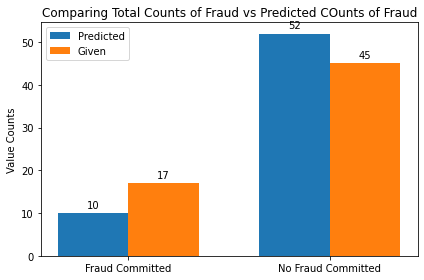

In [42]:
#began plotting the bar chart *outsourced on how to present on a side by side bar chart*
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x - width/2, arr_predict, width, label='Predicted')
rects2 = ax.bar(x + width/2, arr_given, width, label='Given')
ax.set_ylabel('Value Counts')
ax.set_title('Comparing Total Counts of Fraud vs Predicted COunts of Fraud')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [45]:
##Our bar plot denotes the counts of actual fraud and counts of predicted fraud in the clean datasets. The difference and overlap in heights denotes the accuracy of our model.